In [ ]:
# A convenience function to plot the decision region
# This replaces the plotting method that's part of sklearn version 1.1.1
def plotit(X, Y, model):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plotting below requires integer target variables (for colors)
    # However, sklearn algorithm handles categorical variables automagically
    if isinstance(Y[0], str):
        print("Converting strings to integers for plotting")
        Z = pd.factorize(Z)[0]
        Y = pd.factorize(Y)[0]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(());

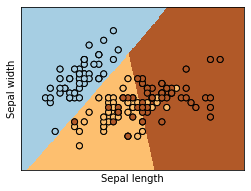

In [ ]:
# This code comes right from the documentation
# The exception: sklearn docs use v1.1.1 and a decision-region plotting function
# I'm using the "plotit" function above instead
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

plotit(X, Y, logreg)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)

plt.xticks(())
plt.yticks(())

plt.show()

$$
z = w_0 + \sum_{i=1}^p w_i x_i = \mathbf{w}^T \mathbf{x}
$$
Note that $z$ can take on any value from $- \infty $ to $+ \infty$.
With logistic regression, we model the log-odds as a linear function of $z$. 
$$
\mathrm{log} \left( \frac{p}{1-p} \right) = \mathrm{logit}(p) = z
$$
This is where the term logistic regression comes from. We're "fitting" a line to the log-odds (${p}/{(1-p)}$ is the odds of a positive outcome). With least-squares linear regression, we minimize MSE. With logistic regression, we maximize the log likelihood as defined by Eqn (4.5) on p135. Note that this function weights the data according to whether or not they are correctly classified (hence the two products in Eqn 4.5).

Note: If the errors in linear regression have a normal distribution, then least-squares is also maximum likelihood.

We can solve this equation for $p$, which yields an "activation function" $\phi(z)$
$$
p(z) = \phi(z) = \frac{1}{1 + e^{-z}} = \mathrm{sigmoid(z)}
$$
Note that the tensorflow playground allowed you to select an activation function, one of which was sigmoid.

EXERCISE: Reproduce Figure 4.2 on p133 of ISLR2

In [ ]:
Y_1D = iris.target[:100]
X_1D = iris.data[:100, :1] 

assert X_1D.shape == (100,1)
assert Y_1D.shape == (100,)



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])